In [132]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [133]:
data_type = 'freq'
df = pd.read_csv((f'nasa_bearing_dataset/df_{data_type}.csv'), index_col=False)

In [134]:
# df.drop(columns='Unnamed: 0',inplace=True)

In [135]:
df.shape

(6706, 10241)

In [136]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10231,10232,10233,10234,10235,10236,10237,10238,10239,target
0,0.267459,0.001168,0.001828,0.001987,0.002317,0.001537,0.001837,0.007169,0.004013,0.002827,...,0.000134,0.000284,0.000320,0.000333,0.000109,0.000244,0.000192,0.000161,0.000140,normal
1,0.269765,0.001087,0.000840,0.002886,0.002624,0.001982,0.001911,0.003913,0.005833,0.002960,...,0.000280,0.000182,0.000290,0.000255,0.000298,0.000117,0.000107,0.000202,0.000195,normal
2,0.261961,0.001718,0.002398,0.001542,0.003211,0.002696,0.003610,0.007068,0.005708,0.003775,...,0.000260,0.000167,0.000119,0.000012,0.000232,0.000130,0.000161,0.000098,0.000306,normal
3,0.269995,0.001529,0.003989,0.002137,0.003351,0.001355,0.002770,0.004761,0.002046,0.002703,...,0.000225,0.000273,0.000092,0.000286,0.000514,0.000119,0.000418,0.000588,0.000133,normal
4,0.262652,0.003813,0.003515,0.001072,0.002476,0.002688,0.002649,0.005884,0.005924,0.002753,...,0.000330,0.000082,0.000094,0.000290,0.000293,0.000064,0.000123,0.000182,0.000246,normal


In [137]:
df['target'].unique()

array(['normal', 'inner race', 'roller element', 'outer race'],
      dtype=object)

In [138]:
df.groupby('target').agg({'target':['count']})

,target
,count
target,
inner race,70
normal,5077
outer race,705
roller element,854


In [139]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [140]:
mapping = {index: label for index, label in enumerate(encoder.classes_)}

print("\nMapping of encoded values to original labels:")
print(mapping)


Mapping of encoded values to original labels:
{0: 'inner race', 1: 'normal', 2: 'outer race', 3: 'roller element'}


In [141]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10231,10232,10233,10234,10235,10236,10237,10238,10239,target
0,0.267459,0.001168,0.001828,0.001987,0.002317,0.001537,0.001837,0.007169,0.004013,0.002827,...,0.000134,0.000284,0.000320,0.000333,0.000109,0.000244,0.000192,0.000161,0.000140,1
1,0.269765,0.001087,0.000840,0.002886,0.002624,0.001982,0.001911,0.003913,0.005833,0.002960,...,0.000280,0.000182,0.000290,0.000255,0.000298,0.000117,0.000107,0.000202,0.000195,1
2,0.261961,0.001718,0.002398,0.001542,0.003211,0.002696,0.003610,0.007068,0.005708,0.003775,...,0.000260,0.000167,0.000119,0.000012,0.000232,0.000130,0.000161,0.000098,0.000306,1
3,0.269995,0.001529,0.003989,0.002137,0.003351,0.001355,0.002770,0.004761,0.002046,0.002703,...,0.000225,0.000273,0.000092,0.000286,0.000514,0.000119,0.000418,0.000588,0.000133,1
4,0.262652,0.003813,0.003515,0.001072,0.002476,0.002688,0.002649,0.005884,0.005924,0.002753,...,0.000330,0.000082,0.000094,0.000290,0.000293,0.000064,0.000123,0.000182,0.000246,1


In [142]:
df.isna().sum().sum()

0

In [143]:
df.shape

(6706, 10241)

In [144]:
df.groupby('target').agg({'target':['count']})

,target
,count
target,
0,70
1,5077
2,705
3,854


In [145]:
# Standardize the features
X = df.drop("target", axis=1) 
y = df["target"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5364, 10240)
(1342, 10240)
(5364,)
(1342,)


In [147]:
pd.DataFrame(y_train).groupby('target').agg({'target':['count']})

,target
,count
target,
0,59
1,4047
2,578
3,680


In [148]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

def apply_classifier(clf, xTrain, xTest, yTrain, yTest):
    clf.fit(xTrain, yTrain)  # Entrenamiento del modelo
    predictions = clf.predict(xTest)  # Predicciones en el conjunto de prueba
    conf_mtx = confusion_matrix(yTest, predictions)  # Matriz de confusión

    # Definición del área de visualización (2 gráficas)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) 

    # Formato de la matriz de confusión
    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])
    axes[0].set_xlabel('Predicted labels')  # Título del eje x
    axes[0].set_ylabel('True labels')  # Título del eje y
    axes[0].set_title('Confusion Matrix Test')  # Título de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje x
    axes[0].yaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje y

    # Mostrar el reporte de clasificación
    print(classification_report(yTest, predictions)) 

    # Cálculo del AUC para múltiples clases
    yTest_binarized = label_binarize(yTest, classes=[0, 1, 2, 3])
    predictions_binarized = label_binarize(predictions, classes=[0, 1, 2, 3])
    roc_auc = roc_auc_score(yTest_binarized, predictions_binarized, average="macro", multi_class="ovo")
    print("AUC ROC : ", roc_auc)  # Mostrar el resultado del AUC

    # Generación de la curva ROC para múltiples clases
    fpr = dict()
    tpr = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(yTest_binarized[:, i], predictions_binarized[:, i])
        axes[1].plot(fpr[i], tpr[i], label=f'class {i} (auc = {roc_auc:.2f})')

    # Línea diagonal de referencia
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')  # Título del eje x
    axes[1].set_ylabel('True Positive Rate')  # Título del eje y
    axes[1].set_title('ROC')  # Título del gráfico
    plt.legend(loc='lower right')  # Mostrar la leyenda
    plt.show()  # Mostrar las gráficas

# Ejemplo de uso (asegúrate de tener los datos y un clasificador):
# from sklearn.ensemble import RandomForestClassifier
# apply_classifier(RandomForestClassifier(), xTrain, xTest, yTrain, yTest)


              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       1.00      0.99      0.99      1030
           2       0.96      0.98      0.97       127
           3       0.97      0.98      0.97       174

    accuracy                           0.99      1342
   macro avg       0.96      0.94      0.95      1342
weighted avg       0.99      0.99      0.99      1342

AUC ROC :  0.967450268075493


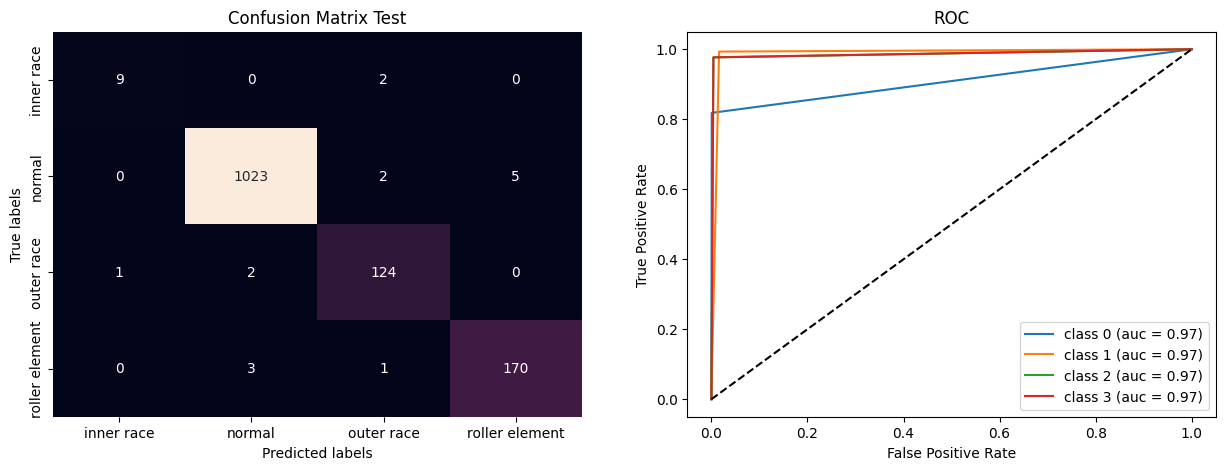

In [149]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construidoS

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.89      1.00      0.94      1030
           2       1.00      0.43      0.60       127
           3       0.91      0.67      0.77       174

    accuracy                           0.90      1342
   macro avg       0.70      0.53      0.58      1342
weighted avg       0.90      0.90      0.88      1342

AUC ROC :  0.7103256640705581


C:\Users\johan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\johan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\johan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

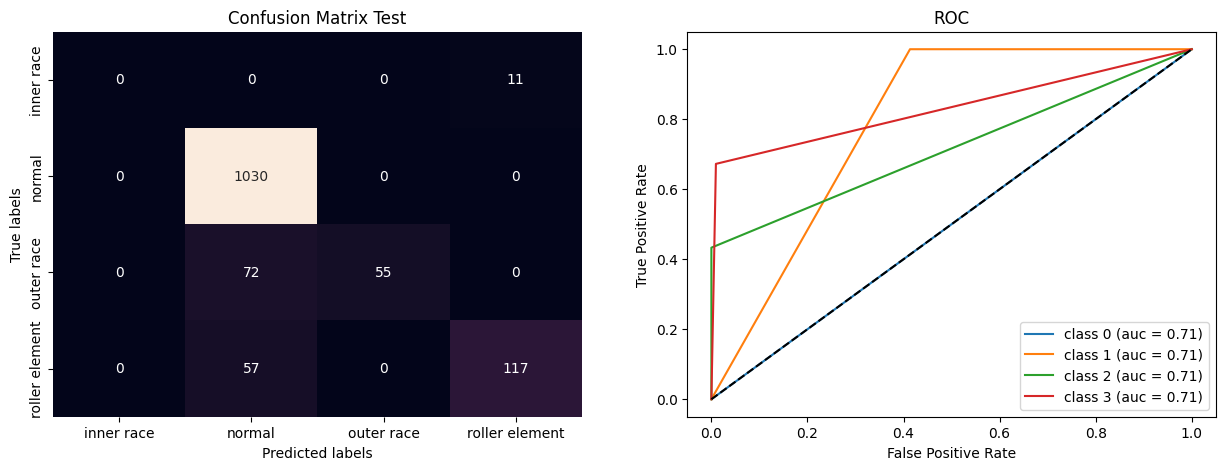

In [150]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.99      1.00      1.00      1030
           2       1.00      0.95      0.98       127
           3       0.99      0.98      0.99       174

    accuracy                           0.99      1342
   macro avg       0.95      0.92      0.93      1342
weighted avg       0.99      0.99      0.99      1342

AUC ROC :  0.9539477882053344


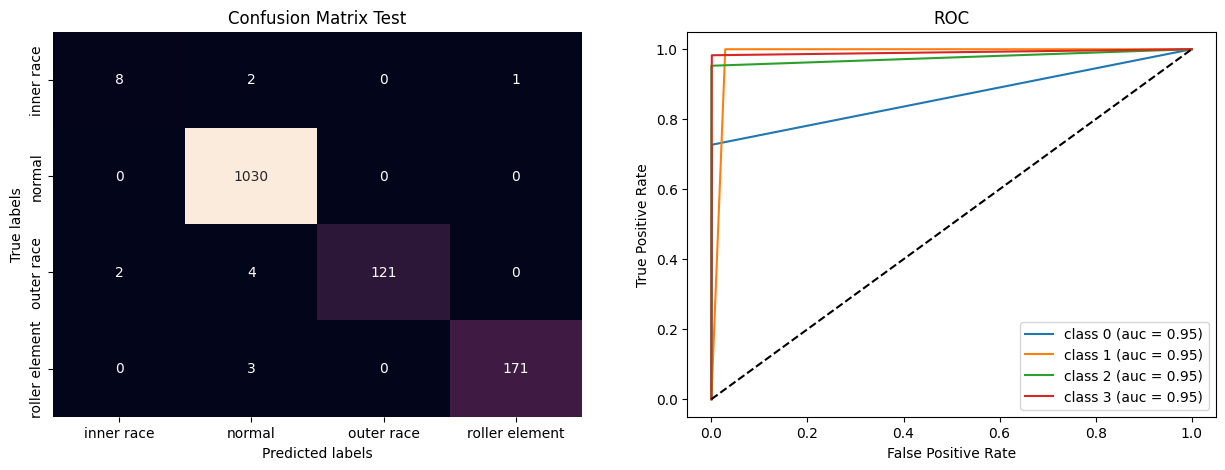

In [151]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00      1030
           2       1.00      0.98      0.99       127
           3       0.99      1.00      1.00       174

    accuracy                           1.00      1342
   macro avg       1.00      1.00      1.00      1342
weighted avg       1.00      1.00      1.00      1342

AUC ROC :  0.997523834489406


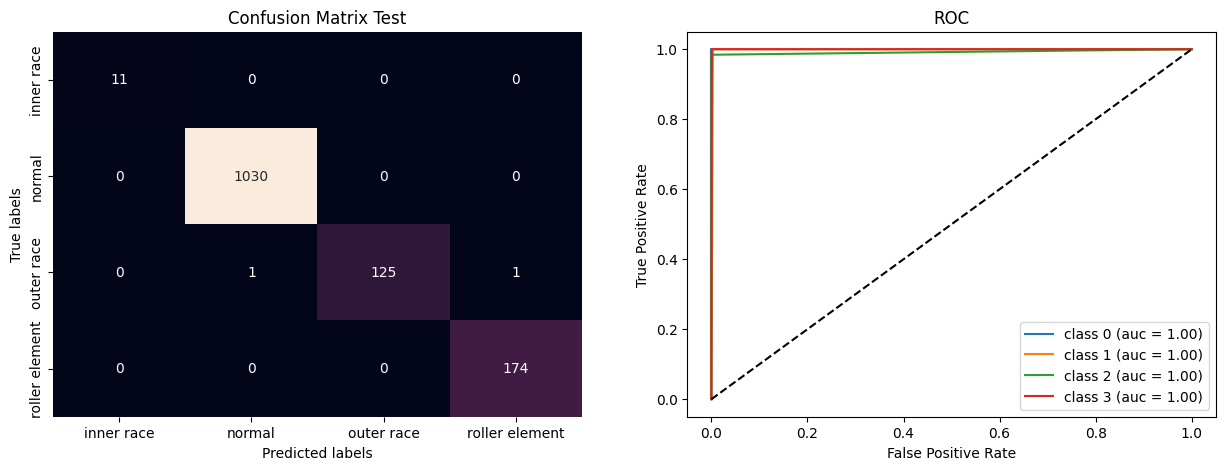

In [152]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

In [153]:
from sklearn.utils import resample

In [154]:
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]
df_class_2 = df[df['target'] == 2]
df_class_3 = df[df['target'] == 3]

In [155]:
# Resample the minority classes to match the majority class
df_class_0_upsampled = resample(df_class_0, 
                                replace=True,    # sample with replacement
                                n_samples=len(df_class_1),  # to match majority class
                                random_state=123)  # reproducible results

df_class_2_upsampled = resample(df_class_2, 
                                replace=True, 
                                n_samples=len(df_class_1), 
                                random_state=123)

df_class_3_upsampled = resample(df_class_3, 
                                replace=True, 
                                n_samples=len(df_class_1), 
                                random_state=123)

In [156]:
df_balanced = pd.concat([df_class_0_upsampled, df_class_1, df_class_2_upsampled, df_class_3_upsampled])


In [157]:
# Standardize the features
X = df_balanced.drop("target", axis=1) 
y = df_balanced["target"]
# Standardize the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
pd.DataFrame(y_train).groupby('target').agg({'target':['count']})

,target
,count
target,
0,4084
1,4021
2,4082
3,4059


In [159]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

def apply_classifier(clf, xTrain, xTest, yTrain, yTest):
    clf.fit(xTrain, yTrain)  # Entrenamiento del modelo
    predictions = clf.predict(xTest)  # Predicciones en el conjunto de prueba
    conf_mtx = confusion_matrix(yTest, predictions)  # Matriz de confusión

    # Definición del área de visualización (2 gráficas)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) 

    # Formato de la matriz de confusión
    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])
    axes[0].set_xlabel('Predicted labels')  # Título del eje x
    axes[0].set_ylabel('True labels')  # Título del eje y
    axes[0].set_title('Confusion Matrix Test')  # Título de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje x
    axes[0].yaxis.set_ticklabels(['inner race', 'normal', 'outer race', 'roller element'])  # Etiquetas del eje y

    # Mostrar el reporte de clasificación
    print(classification_report(yTest, predictions)) 

    # Cálculo del AUC para múltiples clases
    yTest_binarized = label_binarize(yTest, classes=[0, 1, 2, 3])
    predictions_binarized = label_binarize(predictions, classes=[0, 1, 2, 3])
    roc_auc = roc_auc_score(yTest_binarized, predictions_binarized, average="macro", multi_class="ovo")
    print("AUC ROC : ", roc_auc)  # Mostrar el resultado del AUC

    # Generación de la curva ROC para múltiples clases
    fpr = dict()
    tpr = dict()
    for i in range(4):
        fpr[i], tpr[i], _ = roc_curve(yTest_binarized[:, i], predictions_binarized[:, i])
        axes[1].plot(fpr[i], tpr[i], label=f'class {i} (auc = {roc_auc:.2f})')

    # Línea diagonal de referencia
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')  # Título del eje x
    axes[1].set_ylabel('True Positive Rate')  # Título del eje y
    axes[1].set_title('ROC')  # Título del gráfico
    plt.legend(loc='lower right')  # Mostrar la leyenda
    plt.show()  # Mostrar las gráficas

# Ejemplo de uso (asegúrate de tener los datos y un clasificador):
# from sklearn.ensemble import RandomForestClassifier
# apply_classifier(RandomForestClassifier(), xTrain, xTest, yTrain, yTest)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      0.99      0.99      1056
           2       0.99      1.00      1.00       995
           3       1.00      1.00      1.00      1018

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

AUC ROC :  0.9980895443320028


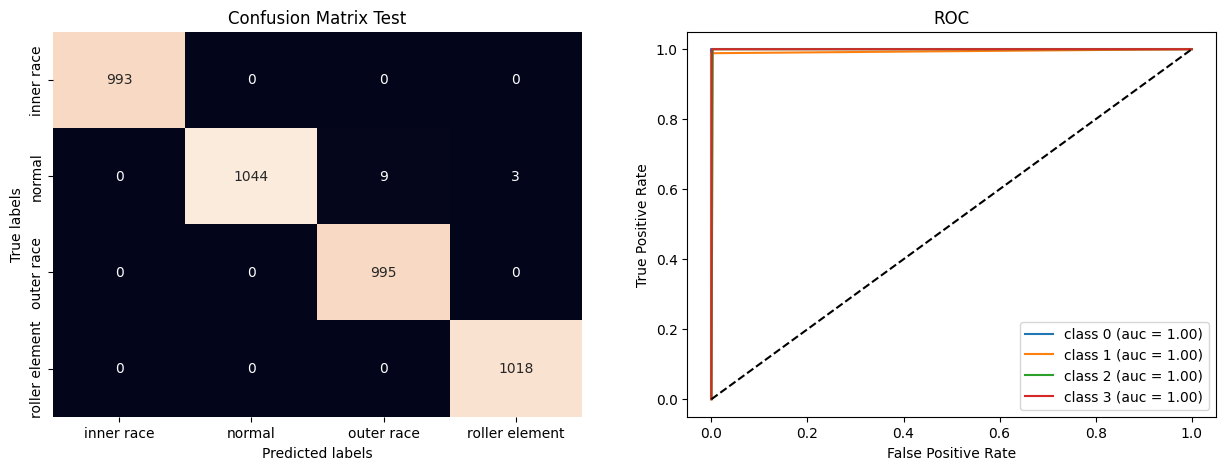

In [160]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       0.83      0.98      0.90      1056
           2       0.99      0.82      0.90       995
           3       0.99      0.96      0.97      1018

    accuracy                           0.94      4062
   macro avg       0.95      0.94      0.94      4062
weighted avg       0.95      0.94      0.94      4062

AUC ROC :  0.9601332171002135


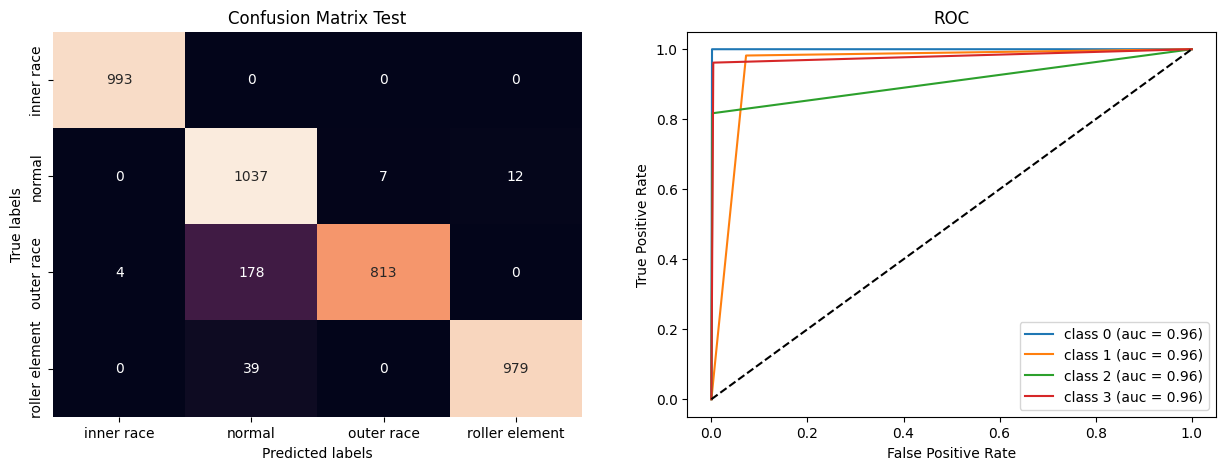

In [161]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00      1056
           2       1.00      1.00      1.00       995
           3       1.00      1.00      1.00      1018

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

AUC ROC :  1.0


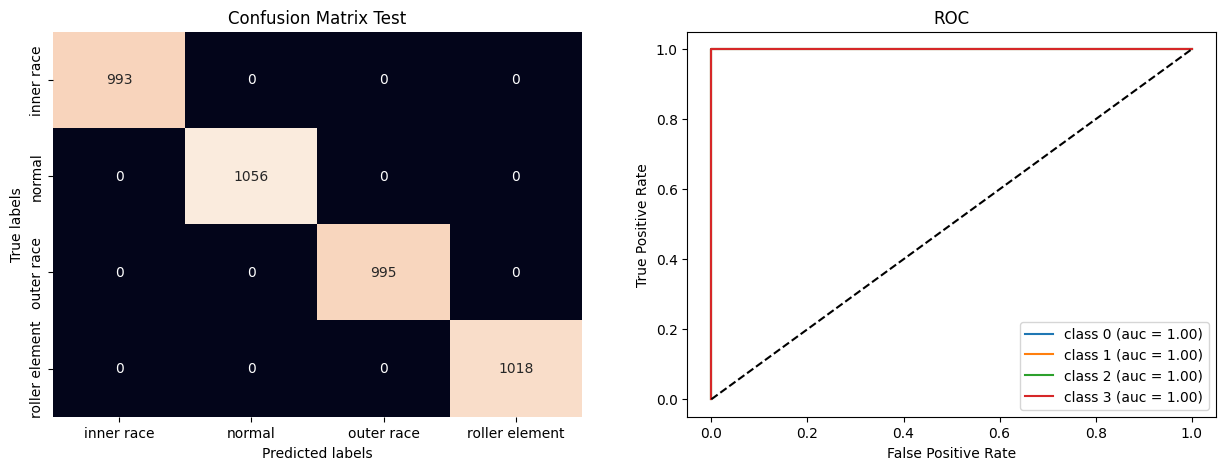

In [162]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       993
           1       1.00      1.00      1.00      1056
           2       1.00      1.00      1.00       995
           3       1.00      1.00      1.00      1018

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062

AUC ROC :  1.0


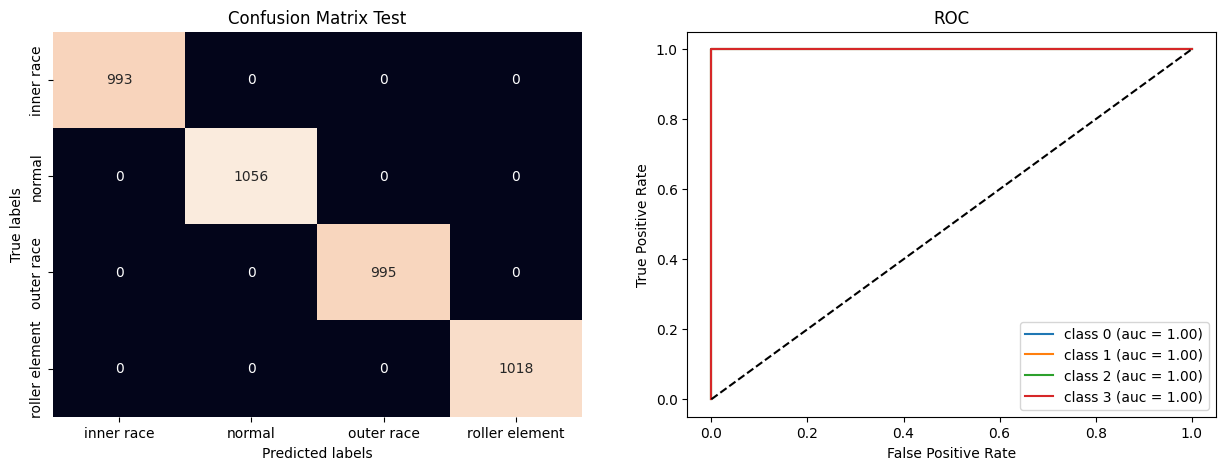

In [163]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)